In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


In [3]:
# Display dataset information
print("Dataset Shape:", X.shape)
print("\nFirst 5 rows:")
print(X.head())

Dataset Shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
X['KMeans_Cluster'] = kmeans_labels

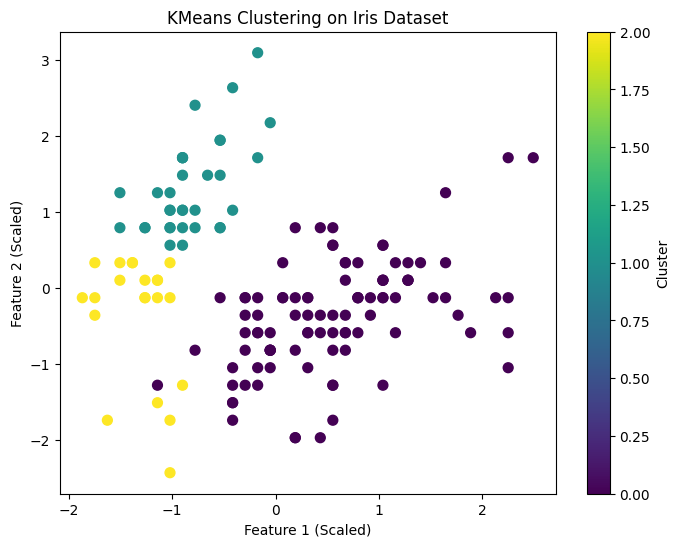

In [6]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.colorbar(label="Cluster")
plt.show()

In [7]:
# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

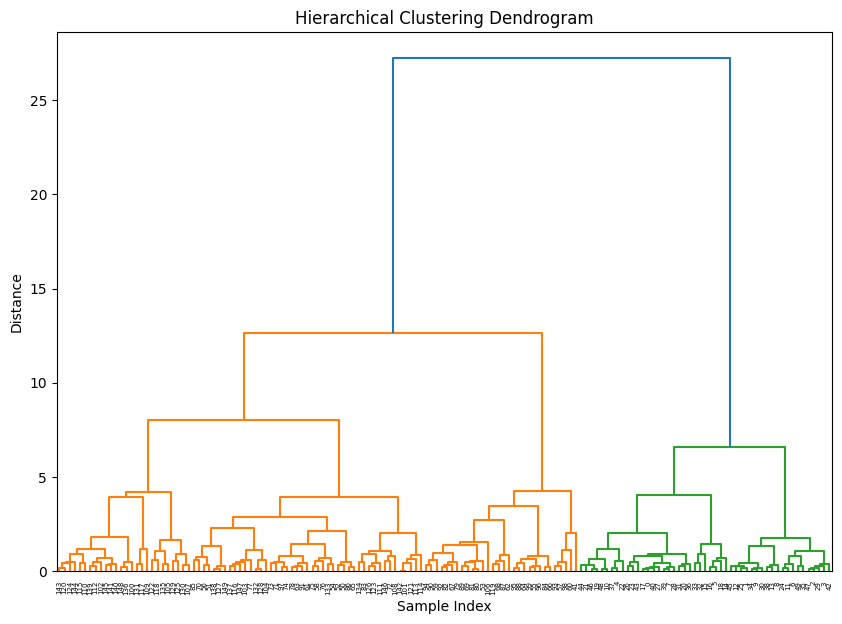

In [8]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [10]:
# Cut the dendrogram to get clusters

hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Add hierarchical cluster labels to the dataset
X['Hierarchical_Cluster'] = hierarchical_labels

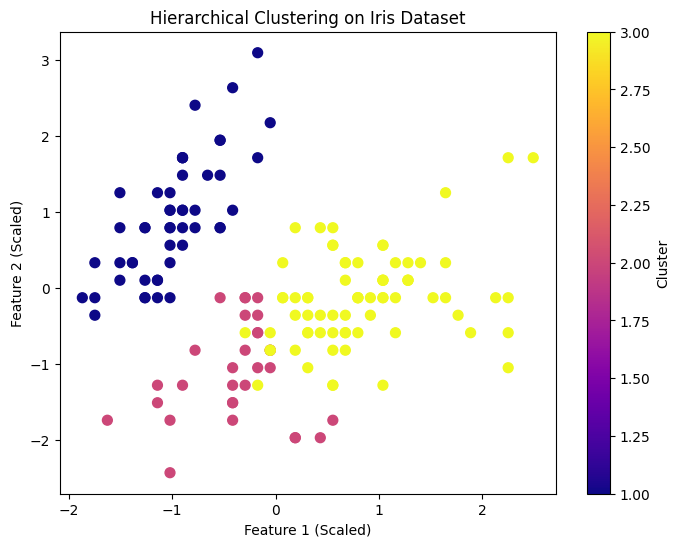

In [11]:
# Visualize Hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.colorbar(label="Cluster")
plt.show()